# Data Wrangling 

## Introduction

## Data Collection

## Common Problems
- Inconsistent column names
- Missing Data
- Outliners
- Duplicate rows
- Untidy
- Need to process columns
- Column type signal unexpected data values

### Checking Column Names 

In [1]:
import pandas as pd
aisle_data = pd.read_csv('Projects/Instacart_2017_05_01/aisles.csv', sep = ',')
aisle_data.columns

Index(['aisle_id', 'aisle'], dtype='object')

In [2]:
dept_data = pd.read_csv('Projects/Instacart_2017_05_01/departments.csv', sep = ',')
dept_data.columns

Index(['department_id', 'department'], dtype='object')

In [3]:
orders_data = pd.read_csv('Projects/Instacart_2017_05_01/orders.csv', sep = ',')
orders_data.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [4]:
prod_data = pd.read_csv('Projects/Instacart_2017_05_01/products.csv', sep = ',')
prod_data.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

In [5]:
order_prod_data = pd.read_csv('Projects/Instacart_2017_05_01/order_products__train.csv', sep = ',')
order_prod_data.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

### Missing Data 

In [6]:
aisle_data.shape

(134, 2)

In [7]:
aisle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
aisle_id    134 non-null int64
aisle       134 non-null object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [8]:
aisle_missing_value = aisle_data.loc[(aisle_data['aisle'] =='missing')]
aisle_missing_value

,aisle_id,aisle
99,100,missing


In [9]:
aisle_duplicated_count = aisle_data.loc[(aisle_data.duplicated() == True)]
aisle_duplicated_count

,aisle_id,aisle


In [10]:
dept_data.shape

(21, 2)

In [11]:
dept_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
department_id    21 non-null int64
department       21 non-null object
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


In [12]:
dept_missing_value = dept_data.loc[(dept_data['department'] =='missing')]
dept_missing_value

,department_id,department
20,21,missing


In [13]:
dept_duplicated_count = dept_data.loc[(dept_data.duplicated() == True)]
dept_duplicated_count

,department_id,department


In [14]:
prod_data.shape

(49688, 4)

In [15]:
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [16]:
prod_missing_value = prod_data.loc[(prod_data['product_name'] =='missing')]
prod_missing_value

,product_id,product_name,aisle_id,department_id


In [17]:
prod_duplicated_count = prod_data.loc[(prod_data.duplicated() == True)]
prod_duplicated_count

,product_id,product_name,aisle_id,department_id


In [18]:
order_prod_data.shape

(1384617, 4)

In [19]:
order_prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
order_id             1384617 non-null int64
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
dtypes: int64(4)
memory usage: 42.3 MB


In [20]:
order_prod_data.groupby('reordered')['reordered'].count()

reordered
0    555793
1    828824
Name: reordered, dtype: int64

In [21]:
order_prod_duplicated_count = order_prod_data.loc[(order_prod_data.duplicated() == True)]
order_prod_duplicated_count

,order_id,product_id,add_to_cart_order,reordered


In [22]:
orders_data.shape

(3421083, 7)

In [23]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [24]:
orders_duplicated_count = orders_data.loc[(orders_data.duplicated() == True)]
orders_duplicated_count

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [27]:
orders_data.groupby('eval_set')['eval_set'].count()

eval_set
prior    3214874
test       75000
train     131209
Name: eval_set, dtype: int64

In [25]:
orders_data.groupby('order_dow')['order_dow'].count()

order_dow
0    600905
1    587478
2    467260
3    436972
4    426339
5    453368
6    448761
Name: order_dow, dtype: int64

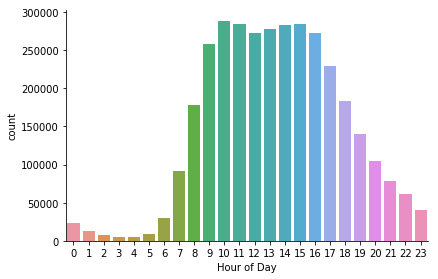

In [26]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

fig1 = sns.factorplot('order_hour_of_day', data=orders_data, kind='count', aspect=1.5)
fig1.set_xlabels('Hour of Day')


### Pivoting